# P2 - ANALYSE DE DONNEES DE SYSTEMES EDUCATIFS

Academy est une start-up de la EdTech qui propose des contenus de **formation en ligne** pour un public de **niveau lycée et université**.

La mission est de réaliser une **analyse exploratoire** de données sur l’éducation de la banque mondiale et déterminer si ces données permettent d’informer le projet d’expansion.

<hr/>

## I. Importation des Librairies utiles

Ici on importe les librairies utilisés tout au long de l'étude.

In [1]:
# librairies pour les graphes
%matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns

# librairies pour les analyses
import pandas as pd
import numpy as np

# librairies pour les i/o
import io

<hr />

## II. Importation des données
<p> Ici on importe les données à partir des fichiers .csv téléchargés sur le site de la Banque Mondiale. </p>

### II.1. Définition de variables contenant les localisations des données

Ici, on définie des variables textes contenant la localisations des fichiers dans le PC.
<p>(3 variables pour 3 localisations de données)

In [2]:
# données numériques
file_data_in = '../Dataset/EdStatsData.csv'

# données textes contenant informations sur les pays
file_country_in = '../Dataset/EdStatsCountry.csv'

# données textes contenant informations sur les indicateurs
file_ind_in = '../Dataset/EdStatsSeries.csv'

### II.2. Importation des données

Ici on importe à proprement parlé les données grâce aux localisations des données définies précédemment.

**II.2.a. Données numériques**

In [3]:
# importation du jeu de données à partir de .csv
raw_data = pd.read_csv(file_data_in)

#affichage de la première ligne
raw_data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**II.2.b. Données textes, informations sur les pays**

In [4]:
# importation des données descriptives des pays
raw_country = pd.read_csv(file_country_in)
raw_country.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


**II.2.c. Données textes, informations sur les indicateurs**

In [5]:
# importation des données descriptives des indicateurs
raw_ind = pd.read_csv(file_ind_in)
raw_ind.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Observations :* 3 jeux de données ont été chargés dont:
<p>- 1 jeu avec des données numériques : l'étude se fera sur ce jeu
<p>- 2 jeux avec des données textes (informations relatives aux différents pays et différents indicateurs) : qui serviront pour l'affinage des données (aide pour choisir les données jugées pertinentes) et pour la comparaison des données.

<hr />

## III. Etudes exploratoires des données

Ici commence l'étude de ces données.

### III.1. Vérification des informations et de la qualité du jeu de données 

Ici, on analysera les données pour mieux les comprendre et pour valider de leur qualité.

**III.1.a. Exploration par colonne** (analyse verticale)

-  Récupération d'informations et description du jeu de données

Ici, on récupère les informations du  jeu de données grâce à la fonction **.info()** le reste du code sert à récupérer ces infos en format texte et les parser de façon à recueuillir les valeurs dont on aura besoin pour la suite de l'étude. Ces valeurs seront contenues dans une table.

In [6]:
# appel de la fonction info() pour récupérer les informations du jeu raw_data sous format chaînes de caractères
buffer = io.StringIO()
raw_data.info(buf=buffer)

# récupération des sorties dans la variable s
s = buffer.getvalue()

# parsing de s pour récupérer les informations utiles uniquement
lignes = s.split('\n')

# création d'un dataframe pour stocker les informations de notre jeu de données
column_infos = pd.DataFrame({'Column':[],'Dtype':[],'Non_Null_Count':[],
                               'Null_Count':[],'Null_Tx':[]})

# ajout des informations de notre jeu de données dans le dataframe infos
for ligne in lignes[5:75]:
    column_infos = column_infos.append({'Column':ligne[5:19].strip('  '),
                                            'Dtype':ligne[38:].strip(' '),
                                            'Non_Null_Count':int(ligne[21:ligne.find(' non-null')])},
                                          ignore_index=True)
    
# ajout des informations sur les valeurs maquantes :
## nombre de valeurs manquantes : nombre de lignes du jeu - nombre de lignes avec des données
column_infos['Null_Count'] = len(raw_data) - column_infos['Non_Null_Count']

## taux de valeurs manquantes : nombre de valeurs manquantes / nombre de lignes du jeu
column_infos['Null_Tx'] =  column_infos['Null_Count'] / len(raw_data)

In [7]:
print(column_infos.to_string())

            Column    Dtype  Non_Null_Count  Null_Count   Null_Tx
0     Country Name   object        886930.0         0.0  0.000000
1     Country Code   object        886930.0         0.0  0.000000
2   Indicator Name   object        886930.0         0.0  0.000000
3   Indicator Code   object        886930.0         0.0  0.000000
4             1970  float64         72288.0    814642.0  0.918496
5             1971  float64         35537.0    851393.0  0.959933
6             1972  float64         35619.0    851311.0  0.959840
7             1973  float64         35545.0    851385.0  0.959924
8             1974  float64         35730.0    851200.0  0.959715
9             1975  float64         87306.0    799624.0  0.901564
10            1976  float64         37483.0    849447.0  0.957738
11            1977  float64         37574.0    849356.0  0.957636
12            1978  float64         37576.0    849354.0  0.957634
13            1979  float64         36809.0    850121.0  0.958498
14        

*Observations :*
<p>- Il y a 70 colonnes dont 4 sont des noms et codes (de types objet) et 65 sont des données annuelles numériques (de types float) et la dernière colonne est complètement vide.
<p>- Il y a beaucoup de valeurs manquantes pour les données annuelles.
<p>- Les taux de valeurs manquantes pour les données (autres que noms) varient de 72,66% (2010) à 99,98% (en 2017).
<p> => Dernière colonne à supprimer

In [8]:
# Sélection des colonnes non vide uniquement
raw_data = raw_data[raw_data.columns[0:-1]]

- Statistiques descriptives

Ici on étudie de plus près les valeurs pour chaque colonne (de type float) en regardant leur ordre de grandeur avec des valeurs statistiques classiques.

In [9]:
# description des données et récupération des sorties dans le dataframe describe
raw_data_description = raw_data.describe()
raw_data_description

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.500000e+00,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.813670e+06,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06


*Observations :*
<p>Les valeurs sont fortement variés. Ce qui n'est pas étonnant car chaque colonne contient des données relatives à différents pays et différents indicateurs.

**III.1.b. Exploration par ligne** (analyse horizontale)

Ici on fera les mêmes étapes que celles réalisées pour l'analyse verticale.

- Nombre de lignes

In [10]:
# nombre de lignes
print('N lignes: ' + str(len(raw_data)))

N lignes: 886930


- Enumerations des pays

In [11]:
# Récupération des listes de pays
liste_pays = raw_data['Country Code'].unique().tolist()
liste_pays

['ARB',
 'EAS',
 'EAP',
 'EMU',
 'ECS',
 'ECA',
 'EUU',
 'HPC',
 'HIC',
 'LCN',
 'LAC',
 'LDC',
 'LMY',
 'LIC',
 'LMC',
 'MEA',
 'MNA',
 'MIC',
 'NAC',
 'OED',
 'SAS',
 'SSF',
 'SSA',
 'UMC',
 'WLD',
 'AFG',
 'ALB',
 'DZA',
 'ASM',
 'AND',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'VGB',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CYM',
 'CAF',
 'TCD',
 'CHI',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COD',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CUW',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'ETH',
 'FRO',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GIB',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'IMN',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',


- Enumerations des indicateurs

In [12]:
# Récupération des listes d'indicateurs
liste_ind = raw_data['Indicator Code'].unique().tolist()
liste_ind

['UIS.NERA.2',
 'UIS.NERA.2.F',
 'UIS.NERA.2.GPI',
 'UIS.NERA.2.M',
 'SE.PRM.TENR',
 'SE.PRM.TENR.FE',
 'UIS.NERA.1.GPI',
 'SE.PRM.TENR.MA',
 'UIS.NERA.3',
 'UIS.NERA.3.F',
 'UIS.NERA.3.GPI',
 'UIS.NERA.3.M',
 'UIS.NIRA.1',
 'UIS.NIRA.1.F',
 'UIS.NIRA.1.GPI',
 'UIS.NIRA.1.M',
 'UIS.LPP.AG15T99',
 'UIS.LP.AG15T99',
 'UIS.LP.AG15T99.F',
 'UIS.LP.AG15T99.M',
 'SE.ADT.LITR.ZS',
 'SE.ADT.LITR.FE.ZS',
 'UIS.LR.AG15T99.GPI',
 'SE.ADT.LITR.MA.ZS',
 'UIS.AFR.AGRADMG.1.PU',
 'UIS.AFR.PBR.1.G1.PU.MATH',
 'UIS.AFR.PBR.1.G2.PU.MATH',
 'UIS.AFR.PBR.1.G3.PU.MATH',
 'UIS.AFR.PBR.1.G4.PU.MATH',
 'UIS.AFR.PBR.1.G5.PU.MATH',
 'UIS.AFR.PBR.1.G6.PU.MATH',
 'UIS.AFR.PBR.1.G7.PU.MATH',
 'UIS.AFR.PBR.1.PU.MATH',
 'UIS.AFR.PBR.1.G1.PU.READ',
 'UIS.AFR.PBR.1.G2.PU.READ',
 'UIS.AFR.PBR.1.G3.PU.READ',
 'UIS.AFR.PBR.1.G4.PU.READ',
 'UIS.AFR.PBR.1.G5.PU.READ',
 'UIS.AFR.PBR.1.G6.PU.READ',
 'UIS.AFR.PBR.1.G7.PU.READ',
 'UIS.AFR.PBR.1.PU.READ',
 'UIS.AFR.CS.1.PU',
 'UIS.AFR.CS.MG.1.PU',
 'UIS.AFR.CS.SG.1.G1.PU',
 'UI

In [13]:
print('N pays : ' + str(len(liste_pays)))
print('N indicateurs : ' + str(len(liste_ind)))

N pays : 242
N indicateurs : 3665


*Observation :*
<p> Il y a 886930 lignes réparties pour 242 pays différents et 3665 indicateurs différents.

- Informations sur les lignes

Cette étape est équivalente à l'appel de la fonction .info() pour les colonnes, néanmoins étant donné qu'il n'y a pas de fonction équivalente pour l'axe des lignes, la création de la table contenant les infos a été totalement codées.

In [14]:
# création d'un dataframe infos pour les lignes à partir de notre jeu de données
## selection des colonnes d'infos (4 premières colonnes)
line_infos = raw_data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']]

# ajout des informations sur les lignes :
## nombre de colonnes contenant des données (autre que les noms) : nombre de colonnes - nombre de colonnes de noms
N_data_line = len(raw_data.columns) - len(line_infos.columns)

## nombre de valeurs manquantes de la ligne
line_infos['Null_Count'] = raw_data.iloc[:,4:].isnull().sum(axis = 1).values

## taux de valeurs manquantes : nombre de valeurs manquantes / (nombre de colonnes - nombre de colonnes de noms)
line_infos['Null_Tx'] = line_infos['Null_Count'] / N_data_line

## nombre de valeurs existantes :  - nombre de valeurs manquantes
line_infos['Non_Null_Count'] = N_data_line - line_infos['Null_Count']

<ipython-input-14-688f368ccf0b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_infos['Null_Count'] = raw_data.iloc[:,4:].isnull().sum(axis = 1).values
<ipython-input-14-688f368ccf0b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_infos['Null_Tx'] = line_infos['Null_Count'] / N_data_line
<ipython-input-14-688f368ccf0b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [15]:
line_infos.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Null_Count,Null_Tx,Non_Null_Count
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,65,1.0,0


In [16]:
# nombre de lignes complètement vide
print('N lignes vides : ' + str(len(line_infos.Non_Null_Count[line_infos['Non_Null_Count']==0])))

# nombre et taux minimum de valeurs manquantes pour une ligne donnée
print('\nValeur Nan dans une ligne\n- N min : ' + str(line_infos['Null_Count'].min()))
print('- Tx min : ' + str(line_infos['Null_Tx'].min()))
print('- Tx max : ' + str(line_infos['Null_Tx'][line_infos['Null_Tx']<1].max()))

N lignes vides : 529525

Valeur Nan dans une ligne
- N min : 18
- Tx min : 0.27692307692307694
- Tx max : 0.9846153846153847


*Observations :*
<p>-> Il n'y a pas de ligne avec des données complètes
<p>-> Il y a beaucoup de lignes sans données (529525) sur les 886930 lignes.
<p>-> Les taux de valeurs manquantes par lignes (autres que noms) varient de 27,69% (correspondant à 18 valeur manquantes) à 98,46% (100% pour les 529525 lignes vides).

<hr />

**III.1.c. Vérification de valeurs dupliquées**

Ici on analyse s'il existe des valeurs dupliquées, et s'il y en a combien sont-elles?
Pour cela on fait appel à la fonction **.duplicated()** pour voir si il y a bien des duplications et **.sum()** pour les compter.

In [17]:
raw_data.duplicated().sum()

0

*Observation :*
<p>Il n'y a pas de valeurs dupliqués

<hr />

### III.2. Tri des données

Ici on essayera de réduire les données de façon à ne sélectionner que celles pertinentes par rapport à leur caractéristique et par rapport à l'objectif de l'étude.

**III.2.a. Tri des données selon les pays et les indicateurs** (tri à partir des lignes)

- ***1er etape : Suppression des lignes complètement vides***

In [18]:
# Récupération des index des lignes complètements vides (à partir du dataframe line_infos)
index_to_suppr = line_infos[(line_infos['Non_Null_Count']==0)].index

# Génération d'un nouveau jeu pour ne pas toucher les données brutes
# Suppression des lignes complètement vides : index dans index_to_suppr
data = raw_data.loc[~raw_data.index.isin(index_to_suppr)].reset_index(drop=True)

In [19]:
data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# nombre de lignes restant
print('taille : ' + str(len(data)))

# nombre de pays
print('N pays : ' + str(len(data['Country Code'].unique())))

# nombre d'indicateurs
print('N ind : ' + str(len(data['Indicator Code'].unique())))

taille : 357405
N pays : 242
N ind : 3665


*Observations :*
<p> - il reste 357405 lignes après la suppression (initialement 886930 lignes)
<p> - les 242 pays sont tous représentés
<p> - les 3665 indicateurs sont tous représentés

- ***2e etape : Exploration des données par pays***

Ici on regarde pour chaque pays le nombre d'indicateurs et leur taux d'indicateurs qui sont renseignés.
<p>(le taux étant le nombre d'indicateurs relatifs au pays par rapport au nombre total d'indicateurs)

In [21]:
# Génération d'un dataframe pour recueillir les infos par pays
pays_infos = pd.DataFrame({'Country Code':[],'N_ind':[],'Tx_ind':[]})

# Complétion des lignes par la liste des pays
pays_infos['Country Code'] = liste_pays

### Pour chaque Pays ###
for pays in liste_pays:
    # Nombre d'indicateurs renseignés (sur 10 les indicateurs choisis)
    pays_infos['N_ind'][(pays_infos['Country Code'] == pays)] = len(data['Indicator Code'][(data['Country Code'] == pays)].unique())

    # Taux d'indicateurs renseignés : Nombre d'indicateurs renseignés / Nombre d'indicateurs finaux  (sélectionnés)
    pays_infos['Tx_ind'][(pays_infos['Country Code'] == pays)] = pays_infos['N_ind'][(pays_infos['Country Code'] == pays)] / len(liste_ind)

<ipython-input-21-32e852428ab7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_infos['N_ind'][(pays_infos['Country Code'] == pays)] = len(data['Indicator Code'][(data['Country Code'] == pays)].unique())
<ipython-input-21-32e852428ab7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_infos['Tx_ind'][(pays_infos['Country Code'] == pays)] = pays_infos['N_ind'][(pays_infos['Country Code'] == pays)] / len(liste_ind)


In [22]:
pays_infos.head(3)

,Country Code,N_ind,Tx_ind
0,ARB,374.0,0.102046
1,EAS,349.0,0.095225
2,EAP,354.0,0.096589


In [23]:
# Informations sur les indicateurs des pays
print('mean : ' + str(pays_infos.Tx_ind.mean()))
print('std : ' + str(pays_infos.Tx_ind.std()))
print('median : ' + str(pays_infos.Tx_ind.median()))
print('min : ' + str(pays_infos.Tx_ind.min()))
print('max : ' + str(pays_infos.Tx_ind.max()))

mean : 0.4029686672003429
std : 0.18970341999231322
median : 0.49481582537517055
min : 0.0005457025920873125
max : 0.6717598908594816


*Observations :*
<p>-> Variabilité des indicateurs entre pays
<p>-> Tx d'indicateurs par pays est en moyenne de 40% des 3665 indicateurs (moins de la moitié des indicateurs)

Ici on effectue une **sélection des pays** en fonction de son nombre d'indicateurs renseignés. On éliminera de notre sélection les pays qui ont peu d'indicateurs renseignés (soit un taux d'indicateurs inférieurs à la distribution basse).

In [24]:
# récupération des codes des pays ayant au moins un taux d'indicateurs égal dans la distribution basse (moyenne-écart type)
select_pays = pays_infos['Country Code'][(pays_infos.Tx_ind >= (pays_infos.Tx_ind.mean()-pays_infos.Tx_ind.std()))].values
select_pays

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN',
       'KOR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY',
       'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MNE',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER',
       'NGA', 'NOR',

In [25]:
# tri des données en selectionnant les pays dans cette liste uniquement
data = data.loc[data['Country Code'].isin(select_pays)].reset_index(drop=True)
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
len(select_pays)

190

In [27]:
# Les pays éliminés
set(raw_data['Country Name'].unique()) - set(data['Country Name'].unique())

{'American Samoa',
 'Arab World',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Curacao',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Faroe Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Isle of Man',
 'Kiribati',
 'Korea, Dem. People’s Rep.',
 'Kosovo',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Micronesia, Fed. Sts.',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'Monaco',
 'Nauru',
 'New Caledonia',
 'North America',
 'Northern Mariana Islands',
 'OECD members',
 'Palau',
 'San Marino',
 'Sint Maarten (Dutch part)',
 'South Asia',
 'S

Observations:
<p> -> Il reste au final 190 pays après le tri

- ***3e etape : Exploration des données par indicateurs***

Ici, même chose que pour les pays précédemment. On regarde pour chaque indicateur le nombre de pays et leur taux de pays qui sont renseigné.
<p>(le taux étant le nombre de pays relatifs à l'indicateur par rapport au nombre total de pays restants)

In [28]:
# Génération d'un dataframe pour recueillir les infos par indicateur
ind_infos = pd.DataFrame({'Indicator Code':[],'Topic':[],'N_country':[],'Tx_country':[]})

# Complétion des lignes par la liste des indicateurs
ind_infos['Indicator Code'] = liste_ind

### Pour chaque indicateur ###
for ind in liste_ind:
    # Récupération de l'index dans raw_ind
    try:
        index = raw_ind.index[raw_ind['Series Code'] == ind][0]
    except:
        index = raw_ind.index[raw_ind['Indicator Name'] == data.loc[data['Indicator Code'] == ind,'Indicator Name'].values[0]][0]
    
    # Topic de l'indicateur : retrouvé dans le jeu sur les indicateurs (Series Code dans raw_ind étant équivalent à Indicator Code)
    ind_infos.loc[ind_infos['Indicator Code'] == ind,'Topic'] = raw_ind.loc[index]['Topic']
    
    # Nombre de pays ayant des données sur cet indicateur
    ind_infos.loc[ind_infos['Indicator Code'] == ind,'N_country'] = len(data.loc[data['Indicator Code'] == ind,'Country Code'].unique())

    # Taux de pays concernés : Nombre de pays renseigné / Nombre de pays totaux 
    ind_infos.loc[ind_infos['Indicator Code'] == ind,'Tx_country'] = ind_infos.loc[ind_infos['Indicator Code'] == ind,'N_country'] / len(liste_pays)

In [29]:
ind_infos.head(3)

,Indicator Code,Topic,N_country,Tx_country
0,UIS.NERA.2,Secondary,171.0,0.706612
1,UIS.NERA.2.F,Secondary,168.0,0.694215
2,UIS.NERA.2.GPI,Secondary,168.0,0.694215


In [30]:
# Informations sur les taux de pays ayant en commun les indicateurs
print('mean : ' + str(ind_infos.Tx_country.mean()))
print('std : ' + str(ind_infos.Tx_country.std()))
print('median : ' + str(ind_infos.Tx_country.median()))
print('min : ' + str(ind_infos.Tx_country.min()))
print('max : ' + str(ind_infos.Tx_country.max()))

mean : 0.38337072824236196
std : 0.2846438720885787
median : 0.3140495867768595
min : 0.004132231404958678
max : 0.7851239669421488


*Observations :*
<p>-> Variabilité des pays pour les indicateurs
<p>-> Tx de pays par indicateur est en moyenne de 38% des 190 pays selectionnés (moins de la moitié des pays)

Ici on effectue une **sélection des indicateurs** en fonction de son nombre de pays renseignés. On éliminera de notre sélection les pays qui ont peu d'indicateurs renseignés (soit un taux d'indicateurs inférieurs à la valeur médiane).
<p>Ici la médiane est choisie compte tenu du nombre élevé d'indicateurs.

In [31]:
# critère de selection : taux de pays supérieur ou égal au taux médiane
select_ind_infos = ind_infos[(ind_infos.Tx_country >= ind_infos.Tx_country.median())].reset_index(drop=True)
select_ind_infos.head(3)

,Indicator Code,Topic,N_country,Tx_country
0,UIS.NERA.2,Secondary,171.0,0.706612
1,UIS.NERA.2.F,Secondary,168.0,0.694215
2,UIS.NERA.2.GPI,Secondary,168.0,0.694215


In [32]:
# les topics supprimés
set(ind_infos.Topic.unique())-set(select_ind_infos.Topic.unique())

{'EMIS',
 'Early Child Development (SABER)',
 'Education Management Information Systems (SABER)',
 'Engaging the Private Sector (SABER)',
 'Laber',
 'School Autonomy and Accountability (SABER)',
 'School Finance (SABER)',
 'School Health and School Feeding (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)'}

In [33]:
print('N indicateurs : ' + str(len(select_ind_infos)))
print('N topic : ' + str(len(select_ind_infos.Topic.unique())))

N indicateurs : 1924
N topic : 25


*Observations :*
<p> Il reste 1924 indicateurs (sur les 3665) répartis sur 25 topics après le précédent tri des indicateurs.

- ***4e etape : Tri des indicateurs en fonction de leur topic***

Ici on choisit les indicateurs selon leur topic (topic pertinent par rapport à l'objectif de l'étude).

In [34]:
# visualisation des topics des indicateurs
select_ind_infos.Topic.unique()

array(['Secondary', 'Primary', 'Literacy', 'Expenditures', 'Attainment',
       'Background', 'Early Childhood Education', 'Tertiary',
       'Post-Secondary/Non-Tertiary',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Pre-Primary', 'Infrastructure: Communications',
       'Social Protection & Labor: Labor force structure',
       'Health: Mortality', 'Teachers', 'Learning Outcomes',
       'Health: Population: Dynamics', 'Population',
       'Health: Population: Structure', 'Health: Risk factors',
       'Education Equality', 'Social Protection & Labor: Unemployment'],
      dtype=object)

Choix des topics selon 4 axes : démographie, éducation (ou niveau d'étude), ressource matériel, ressource économique

In [35]:
# critère de selection : en fonction du Topic
# topic en relation avec objectif du start-up academy (etude de marché pour formation en ligne pour niveau lycee et universite)
topic_to_take = [# DEMOGRAPHIE
                 'Health: Population: Structure',
                 'Social Protection & Labor: Unemployment',
    
                 # EDUCATION / STUDY LEVEL
                 'Attainment',
                 'Social Protection & Labor: Labor force structure',
    
                 # MATERIEL
                 'Infrastructure: Communications',
                 
                 # ECONOMIE
                 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
                 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
                 'Economic Policy & Debt: Purchasing power parity',
                 'Expenditures'
                  ]

# sélection des indicateurs dont le topic n'est pas dans topic_to_cancel
select_ind_infos = select_ind_infos.loc[select_ind_infos['Topic'].isin(topic_to_take)].reset_index(drop=True)
select_ind_infos.head(3)

,Indicator Code,Topic,N_country,Tx_country
0,UIS.XSPENDP.2.FDPUB.FNS,Expenditures,120.0,0.495868
1,UIS.XSPENDP.4.FDPUB.FNS,Expenditures,81.0,0.334711
2,UIS.XSPENDP.0.FDPUB.FNS,Expenditures,114.0,0.471074


In [36]:
# N indicateurs
len(select_ind_infos)

850

*Observation :*
<p> Il reste 850 indicateurs (sur les 1924) après le précédent tri selon le topic 

- ***5e etape : Choix d'indicateurs parmi les topics sélectionnés***

Ici on regarde si les indicateurs ayant le plus de nombre de pays renseignés sont pertinents (par rapport à leur description et l'objectif de l'étude).

In [37]:
# Essaie de tri selon le taux max de pays renseignés pour chaque topic
for t in select_ind_infos.Topic.unique():
    print('---> topic : ' + t + ' ( avec ' + str(len(select_ind_infos[select_ind_infos['Topic']==t])) + ' ind)')
    # Valeur max du taux de pays renseignés sur les 242
    tx_max = select_ind_infos.loc[(select_ind_infos['Topic']==t),'Tx_country'].max()
    # Récupération des codes des indicateurs ayant ce taux maxm
    t_ind = select_ind_infos.loc[(select_ind_infos['Topic']==t) & (select_ind_infos['Tx_country']==tx_max),'Indicator Code'].values
    for i in t_ind :
        # affichage des noms des indicateurs
        defi = raw_data.loc[(raw_data['Indicator Code']) == i,'Indicator Name'].values[0]
        print('     - code : ' + i)
        print('     ' + defi)
    print('\n')

---> topic : Expenditures ( avec 90 ind)
     - code : SE.XPD.TOTL.GD.ZS
     Government expenditure on education as % of GDP (%)


---> topic : Attainment ( avec 722 ind)
     - code : UIS.EA.2T6.AG25T99.F
     UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Female
     - code : UIS.EA.2T6.AG25T99.M
     UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Male
     - code : UIS.EA.2T6.AG25T99
     UIS: Percentage of population age 25+ with at least completed lower secondary education (ISCED 2 or higher). Total


---> topic : Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators ( avec 2 ind)
     - code : NY.GDP.MKTP.KD
     GDP at market prices (constant 2005 US$)
     - code : NY.GDP.PCAP.KD
     GDP per capita (constant 2005 US$)


---> topic : Economic Policy & Debt: Purchasing power parity ( avec 6 ind)
     - code : NY.GDP.P

*Observations :*
<p> -> certains de ces indicateurs semblent pertinents mais en se penchant mieux sur leurs <strong>définitions dans le fichier EdStatsSeries.csv</strong>, il peut y avoir une redondance des informations entre plusieurs indicateurs (meme s'ils ont des topics différents)
<p> -> nous faisons le choix de garder <strong>2 ou 3 indicateurs pertinents par axes d'analyses</strong> et cela selon leur pertinence jugé par rapport à l'objectif de cette étude

Ici, après l'étude de leurs descriptions et caractéristiques, on choisit **10 indicateurs** répartis sur les 4 axes d'étude.

In [38]:
# liste des indicateurs choisis
final_indicator = ['SP.POP.TOTL','SL.TLF.TOTL.IN','SL.UEM.TOTL.ZS',### DEMOGRAPHIE                   
                   'BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS',### EDUCATION / STUDY LEVEL                 
                   'IT.CMP.PCMP.P2','IT.NET.USER.P2',### MATERIEL                  
                   'SE.XPD.TOTL.GD.ZS','NY.GDP.PCAP.PP.CD','NY.GNP.PCAP.PP.CD',### ECONOMIE
                  ]

In [39]:
# affichage des definitions des indicateurs et du pourcentage des pays possedant des donnees
for i in final_indicator :
    # affichage des noms des indicateurs
    defi = raw_data.loc[(raw_data['Indicator Code'] == i),'Indicator Name'].values[0]
    tx = select_ind_infos.loc[(select_ind_infos['Indicator Code'] == i),'Tx_country'].values[0]
    print('' + i + ' : (Tx = ' + str(tx) + ')')
    print('   ' + defi)

SP.POP.TOTL : (Tx = 0.7851239669421488)
   Population, total
SL.TLF.TOTL.IN : (Tx = 0.743801652892562)
   Labor force, total
SL.UEM.TOTL.ZS : (Tx = 0.743801652892562)
   Unemployment, total (% of total labor force)
BAR.SEC.ICMP.15UP.ZS : (Tx = 0.5950413223140496)
   Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)
BAR.TER.ICMP.15UP.ZS : (Tx = 0.5950413223140496)
   Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)
IT.CMP.PCMP.P2 : (Tx = 0.756198347107438)
   Personal computers (per 100 people)
IT.NET.USER.P2 : (Tx = 0.7851239669421488)
   Internet users (per 100 people)
SE.XPD.TOTL.GD.ZS : (Tx = 0.768595041322314)
   Government expenditure on education as % of GDP (%)
NY.GDP.PCAP.PP.CD : (Tx = 0.7603305785123967)
   GDP per capita, PPP (current international $)
NY.GNP.PCAP.PP.CD : (Tx = 0.756198347107438)
   GNI per capita, PPP (current international $)


Ici on récupère les données relatifs à ces 10 indicateurs choisis

In [40]:
# recuperation des donnees a partir de la liste d'indicateurs choisis
data = data.loc[data['Indicator Code'].isin(final_indicator)].reset_index(drop=True)
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,1.31,NaN,NaN,NaN,NaN,1.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.ICMP.15UP.ZS,2.06,NaN,NaN,NaN,NaN,2.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- ***6e etape : Sélection des pays ayant des données pour tous les 10 indicateurs uniquement***

(~ suppression des pays qui n'ont pas des données sur tous ces 10 indicateurs)

In [41]:
# liste les pays a supprimer (pays qui n'a pas de donnees pour tous les 8 indicateurs)
country_to_cancel = []
for pays in data['Country Code'].unique():
    if len(data[data['Country Code']==pays]['Indicator Code'])<10:
        country_to_cancel.append(pays)

In [42]:
# affichage des pays supprimés
set(data['Country Name'][data['Country Code'].isin(country_to_cancel)])

{'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Aruba',
 'Azerbaijan',
 'Bahamas, The',
 'Belarus',
 'Bermuda',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Burkina Faso',
 'Cabo Verde',
 'Chad',
 'Comoros',
 'Cuba',
 'Djibouti',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Georgia',
 'Grenada',
 'Guinea',
 'Guinea-Bissau',
 'Kazakhstan',
 'Lebanon',
 'Liberia',
 'Liechtenstein',
 'Macedonia, FYR',
 'Madagascar',
 'Marshall Islands',
 'Montenegro',
 'Nigeria',
 'Oman',
 'Puerto Rico',
 'Samoa',
 'Sao Tome and Principe',
 'Seychelles',
 'Sierra Leone',
 'Solomon Islands',
 'Somalia',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Turkmenistan',
 'Uzbekistan',
 'Vanuatu',
 'West Bank and Gaza'}

Ici on sélectionne uniquement les données des pays qui ne sont pas dans cette liste

In [43]:
# selection des donnees des pays qui ne sont pas de cette liste
data = data[~data['Country Code'].isin(country_to_cancel)]

In [44]:
len(data['Country Code'].unique())

139

*Observations :* Il reste 139 pays après ce tri.

- ***7e etape : Sélection des grands pays (pays ayant un nombre élevé de population)***

Ici on sélectionne uniquement les données des grands pays

In [45]:
# liste des pays dont la taille de la population est en dessous de la médiane
country_to_cancel_2 = []

for year in data.columns[4:51]:
    median = data[data['Indicator Code']=='SP.POP.TOTL'][year].median()
    for pays in data['Country Code'].unique():
        if data[(data['Indicator Code']=='SP.POP.TOTL')&(data['Country Code']==pays)][year].values[0] < median:
            if pays not in country_to_cancel_2:
                country_to_cancel_2.append(pays) 

len(country_to_cancel_2)

78

In [46]:
# affichage des pays supprimés
set(data['Country Name'][data['Country Code'].isin(country_to_cancel_2)])

{'Albania',
 'Armenia',
 'Austria',
 'Bahrain',
 'Barbados',
 'Belize',
 'Benin',
 'Bolivia',
 'Botswana',
 'Brunei Darussalam',
 'Bulgaria',
 'Burundi',
 'Central African Republic',
 'Congo, Rep.',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia, The',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao PDR',
 'Latvia',
 'Lesotho',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macao SAR, China',
 'Malawi',
 'Maldives',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Moldova',
 'Mongolia',
 'Namibia',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Norway',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Portugal',
 'Qatar',
 'Rwanda',
 'Senegal',
 'Serbia',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Swaziland',
 'Sweden',
 'Switzerland',
 'Tajikistan',
 'Togo',
 'Tonga',
 'Tr

Ici on sélectionne uniquement les données des pays qui ne sont pas dans cette liste

In [47]:
# selection des donnees qui ne sont pas de cette liste
data = data[~data['Country Code'].isin(country_to_cancel_2)]

In [48]:
len(data['Country Code'].unique())

61

*Observations :* Il reste 61 pays après ce tri.

<hr />

**III.2.b. Tri des données selon les années** (tri à partir des colonnes)

- ***1e etape : Visualisation brute des données sélectionnées***

Ici on visionne les données sélectionnées pour une meilleur vision.

In [49]:
# Récupération de la liste des années
str_years = data.columns[4:]

# Transformation des années en entier
years = [int(y) for y in str_years]

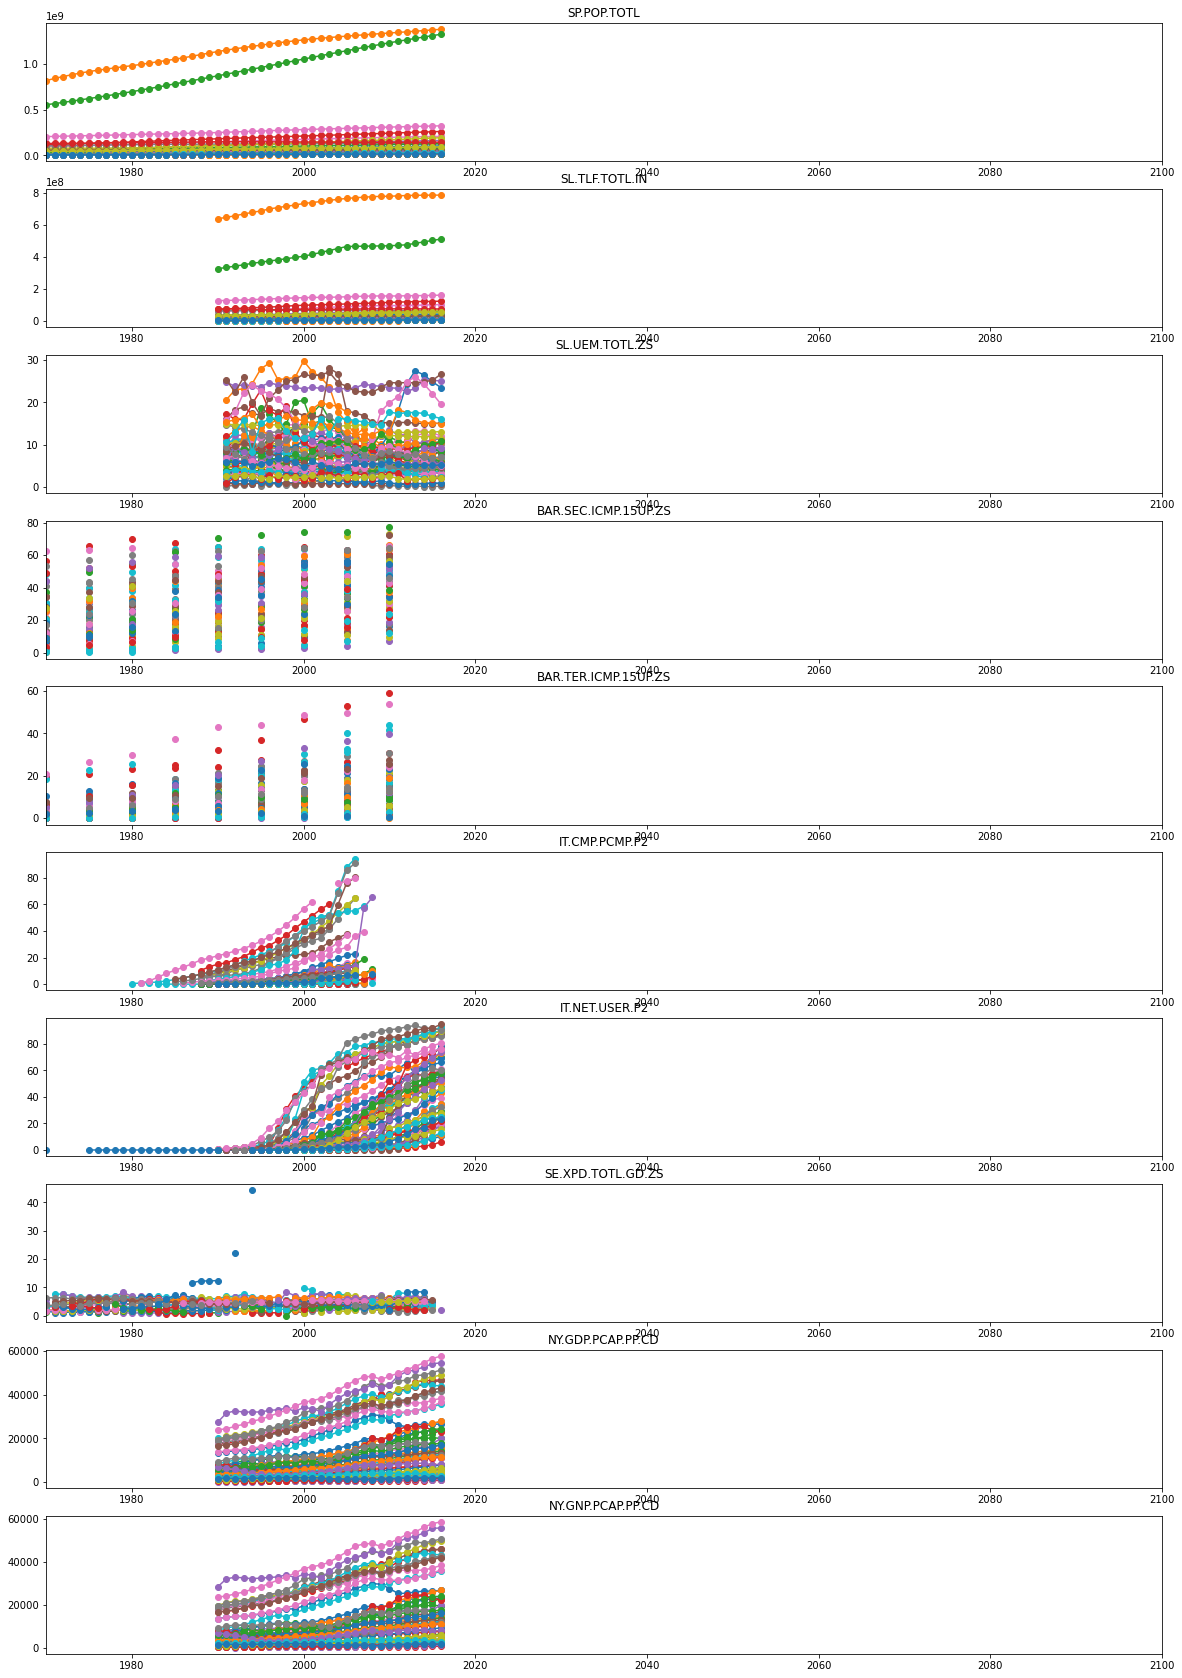

In [50]:
# paramétrage de multi-graphes
fig, axs = plt.subplots(10, 1, sharex=True,figsize=(20,30))

# pour chaque indicateur
for i in range(len(final_indicator)):
    # récupération des données correspondantes
    ess = data[data['Indicator Code']==final_indicator[i]].set_index('Country Code')
    
    # pour chaque pays, trace de la courbe
    for pays in ess.index:
        axs[i].plot(years,ess.loc[pays,str_years],marker='o')
    
    axs[i].set_xlim(1970, 2100)
    axs[i].xaxis.set_tick_params(labelbottom=True)
    axs[i].set_title(final_indicator[i])

*Observations :* Les indicateurs ne présentent pas les mêmes echelles de temps
<p> -> 2 indicateurs avec un pas de temps de données différents des autres (BAR.SEC.CMPT.15UP.ZS', 'BAR.TER.ICMP.15UP.ZS')
<p> -> 6 indicateurs ont peu ou pas de données avant 1990 ('SL.UEM.TOTL.ZS','SL.TLF.TOTL.IN','IT.CMP.PCMP.P2','IT.NET.USER.P2', 'NY.GDP.PCAP.PP.CD','NY.GNP.PCAP.PP.CD')
<p> -> il n'y a aucune donnée (pour aucun de ces indicateurs) apres 2016

- ***2e etape : Sélection d'années***

Compte tenu des irrégularités des pays selon les années, et puisqu'on veut réaliser une étude de marché, on choisira pour toute la suite les données des années de 1995 à 2016 (années pleines et récentes).

In [51]:
# selection des colonnes non vides
data = data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
             '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
             '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015','2016']]

<hr />

### III.3. Analyses des données

**III.3.a. Analyses des données par pays**

- ***Calcul des ordres de grandeur***

Ici on récupère les ordres de grandeurs (moyennes, médianes et écarts) types par pays.

In [52]:
# ajout de colonne avec la moyenne et l'ecart type des valeurs annuelles
data['moy'] = data.mean(axis=1, skipna=True,numeric_only=True)
data['med'] = data.median(axis=1, skipna=True,numeric_only=True)
data['sdv'] = data.std(axis=1, skipna=True,numeric_only=True)

# transformation des données en tableau croisé
# valeur : moyenne de toute les années (1995 à 2016)
data_pivot = pd.pivot_table(data, values='moy', index=['Country Name'],columns=['Indicator Code'])

- ***Analyse selon les axes d'étude***

    - Axe DEMOGRAPHIE

Ici on ordonne les données selon la taille de la population croissante et on réalise un graphe comparatif des pays.

In [53]:
df = data_pivot.sort_values(by='SP.POP.TOTL',ascending=False)

<ipython-input-54-e4d9430a575a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df.index,rotation=90,fontsize=14)
<ipython-input-54-e4d9430a575a>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df.index,rotation=90,fontsize=14)


(0.0, 50.0)

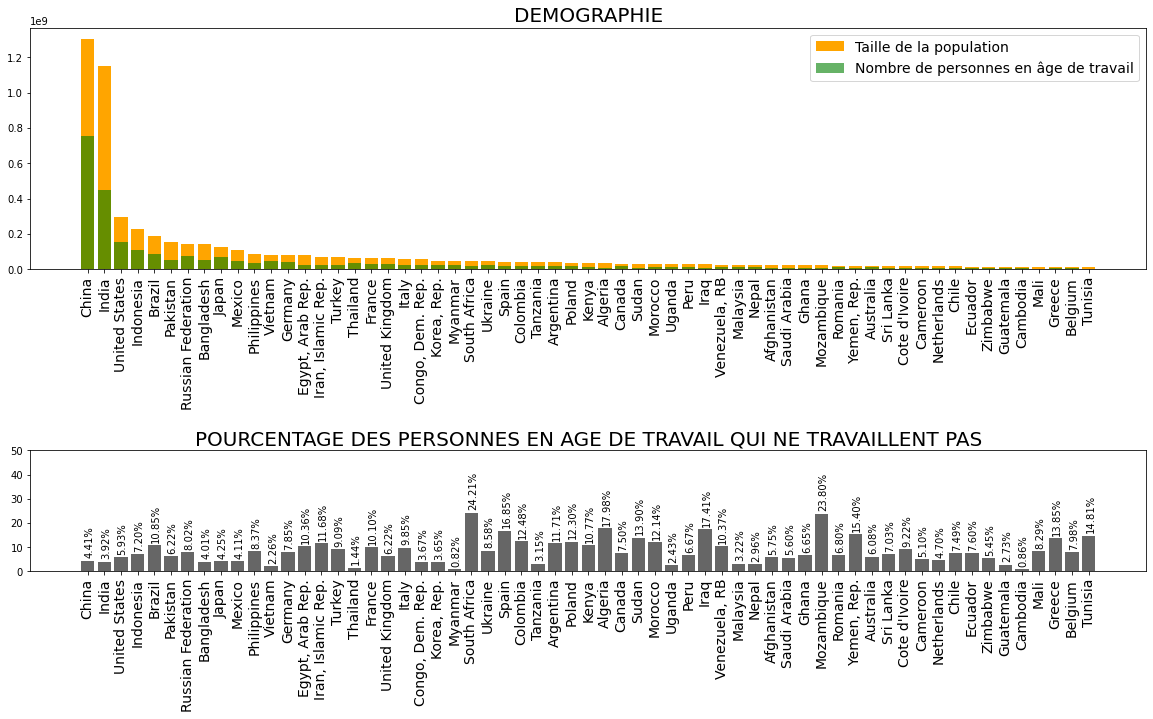

In [54]:
# paramétrage de multi-graphes
fig,axs = plt.subplots(2, 1,figsize=(20,10),gridspec_kw={'height_ratios': [4, 2],'hspace':1})

## 1er plot
# barplot du nombre de population par pays
axs[0].bar(df.index,df['SP.POP.TOTL'],color='orange',label='Taille de la population')

# barplot du nombre de personne dans la force de l'âge par pays   
axs[0].bar(df.index,df['SL.TLF.TOTL.IN'],color='green',alpha=.6,label='Nombre de personnes en âge de travail')

# affichage de titre, légendes
axs[0].set_title('DEMOGRAPHIE',fontsize=20)
axs[0].set_xticklabels(df.index,rotation=90,fontsize=14)
axs[0].legend(fontsize=14)

## 2e plot
# plot du nombre de personne dans la force de l'âge par pays   
axs[1].bar(df.index,df['SL.UEM.TOTL.ZS'],color='k',alpha=.6,label='Taux de personnes en âge de travail sans emploi')
for i, v in enumerate(df['SL.UEM.TOTL.ZS']):
    axs[1].text(i-.2,v+2,str('%.2f'%v)+'%',color='k',rotation=90)

# affichage de titre, légendes
axs[1].set_title('POURCENTAGE DES PERSONNES EN AGE DE TRAVAIL QUI NE TRAVAILLENT PAS',fontsize=20)
axs[1].set_xticklabels(df.index,rotation=90,fontsize=14)
axs[1].set_ylim(top=50)

    - Axe EDUCATION

Ici on ordonne les données selon les valeurs du taux de personne de plus de 15 ans ayant un niveau secondaire et on réalise un graphe comparatif des pays.

In [55]:
df = data_pivot.sort_values(by=['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS'],ascending=False)

<ipython-input-56-799bbd1b15e4>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([100,90,80,70,60,50,40,30,20,10,])
<ipython-input-56-799bbd1b15e4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df.index,rotation=90,fontsize=14)


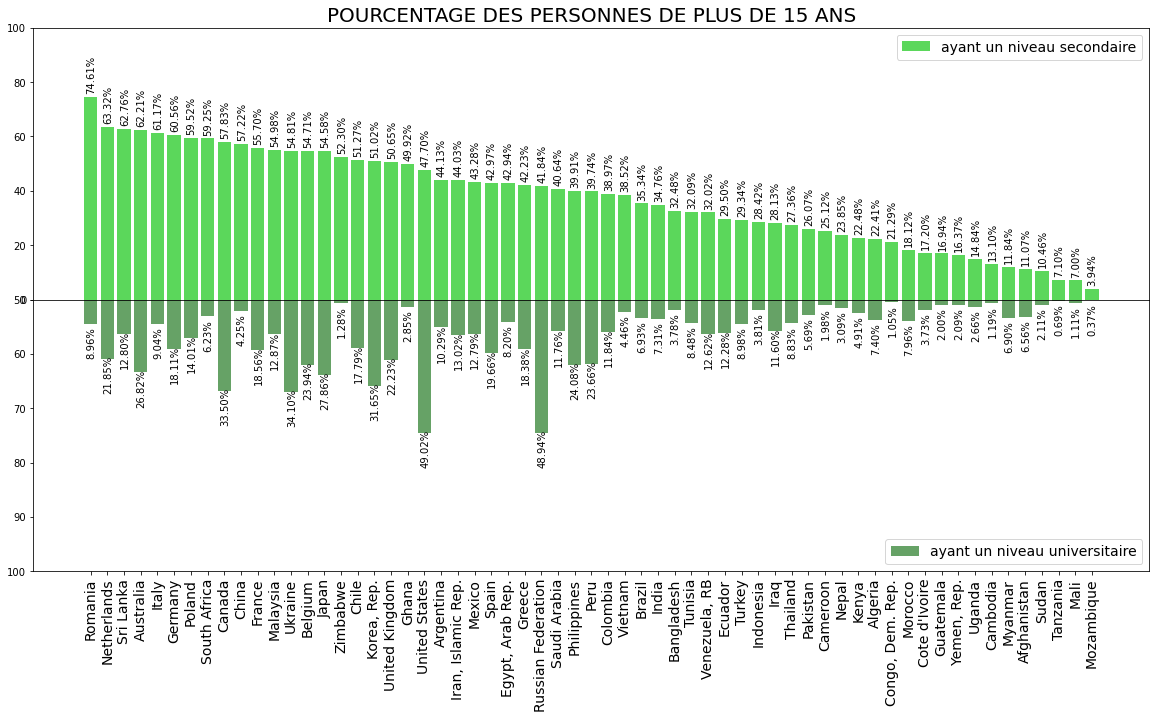

In [56]:
# paramétrage de multi-graphes
fig,axs = plt.subplots(2, 1,figsize=(20,10),gridspec_kw={'hspace':0})

bar_height1 = df['BAR.SEC.ICMP.15UP.ZS']
axs[0].bar(df.index,bar_height1,align='center',color='limegreen',alpha=.8,label='ayant un niveau secondaire')
for i, v in enumerate(df['BAR.SEC.ICMP.15UP.ZS']):
    axs[0].text(i-.25,v+2,str('%.2f'%v)+'%',color='k',rotation=90)
axs[0].set_ylim(top=100)
axs[0].set_title('POURCENTAGE DES PERSONNES DE PLUS DE 15 ANS',fontsize=20)
axs[0].legend(loc='upper right',fontsize=14)

bar_height2 = -df['BAR.TER.ICMP.15UP.ZS']
axs[1].bar(df.index,bar_height2,align='center',color='darkgreen',alpha=.6,label='ayant un niveau universitaire')
for i, v in enumerate(df['BAR.TER.ICMP.15UP.ZS']):
    axs[1].text(i-.25,-v-12,str('%.2f'%v)+'%',color='k',rotation=90)
axs[1].set_ylim(bottom=-100)
axs[1].set_yticklabels([100,90,80,70,60,50,40,30,20,10,])
axs[1].set_xticklabels(df.index,rotation=90,fontsize=14)
axs[1].legend(loc='lower right',fontsize=14)

Moyenne des 2 indicateurs

In [57]:
df = data_pivot[['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS']].mean(axis=1).sort_values(ascending=False)

Text(0.5, 1.0, 'Pourcentage des personnes de plus de 15 ans\nayant au moins un niveau secondaire')

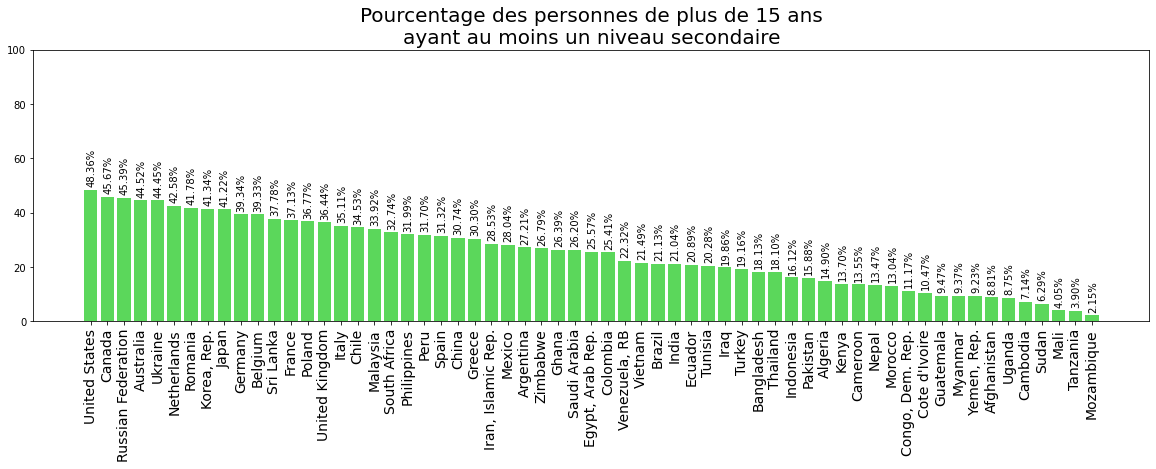

In [58]:
fig = plt.figure(figsize=(20,5))
plt.bar(df.index,df.values,align='center',color='limegreen',alpha=.8)
for i, v in enumerate(df.values):
    plt.text(i-.25,v+2,str('%.2f'%v)+'%',color='k',rotation=90)
plt.ylim(top=100)
plt.xticks(rotation=90,fontsize=14)
plt.title('Pourcentage des personnes de plus de 15 ans\nayant au moins un niveau secondaire',fontsize=20)

    - Axe RESSOURCE MATERIELLE

Ici on ordonne les données selon le Taux de personnes qui utilisent internet et on réalise un graphe comparatif des pays.

In [59]:
df = data_pivot.sort_values(by='IT.NET.USER.P2',ascending=False)

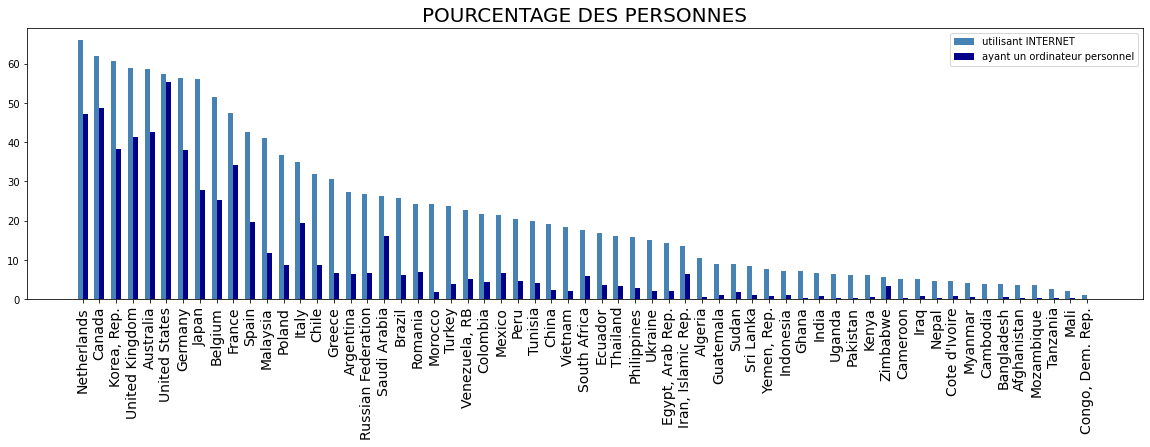

In [60]:
fig = plt.figure(figsize=(20,5))

titles = df.index
y_pos = np.arange(len(titles))
width = 0.3
bar_height1 = df['IT.NET.USER.P2']
bar_height2 = df['IT.CMP.PCMP.P2']

plt.bar(y_pos,bar_height1, width,align='center',color='steelblue',label='utilisant INTERNET')
plt.bar(y_pos+width,bar_height2,width,align='center',color='darkblue',label='ayant un ordinateur personnel')

plt.xticks(y_pos + width/2, titles,rotation=90,fontsize=14)
plt.title('POURCENTAGE DES PERSONNES',fontsize=20)
plt.legend()

    - Axe RESSOURCE ECONOMIQUE

Ici on ordonne les données selon le Revenu National Brut par habitant et on réalise un graphe comparatif des pays.

In [61]:
df = data_pivot.sort_values(by='NY.GNP.PCAP.PP.CD',ascending=False)

<ipython-input-62-6dec2ee4399e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(titles,rotation=90,fontsize=14)


Text(0.5, 1.0, "POURCENTAGE DE DEPENSES NATIONALES RESERVEES A L'EDUCATION")

posx and posy should be finite values
posx and posy should be finite values


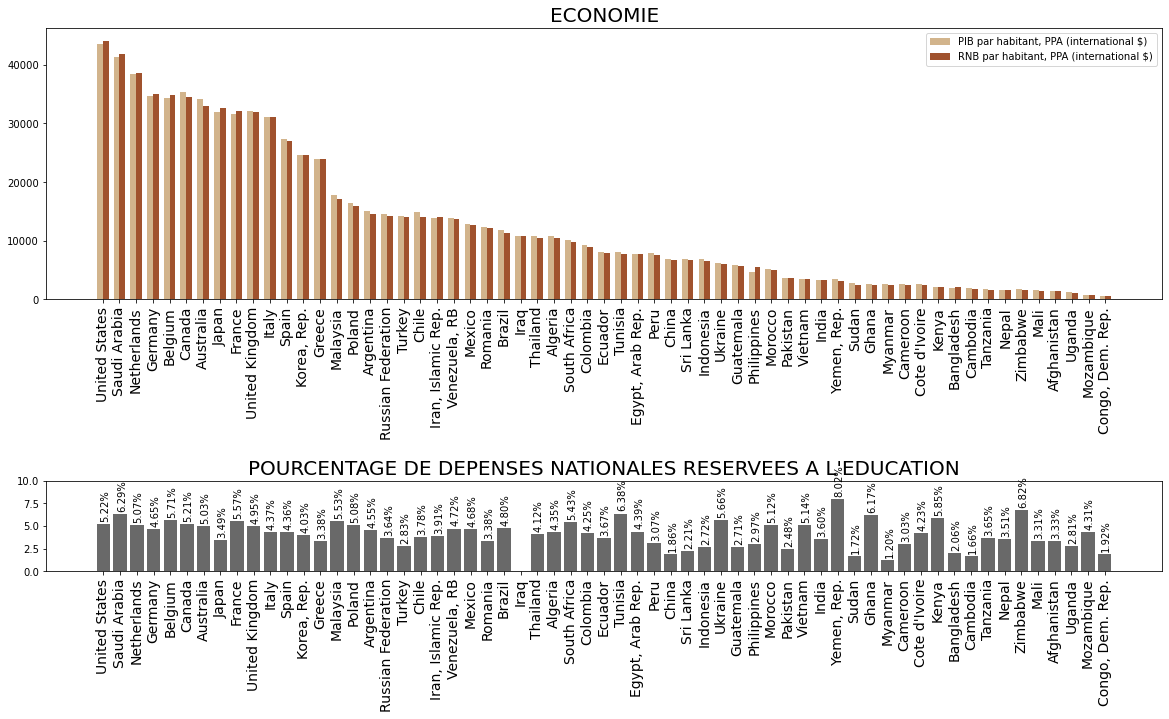

In [62]:
fig,axs = plt.subplots(2, 1,figsize=(20,10),gridspec_kw={'height_ratios': [3, 1],'hspace':1})

titles = df.index
y_pos = np.arange(len(titles))
width = 0.35
bar_height1 = df['NY.GDP.PCAP.PP.CD']
bar_height2 = df['NY.GNP.PCAP.PP.CD']

axs[0].bar(y_pos,bar_height1, width,align='center',color='tan',label='PIB par habitant, PPA (international $)')
axs[0].bar(y_pos+width,bar_height2,width,align='center',color='sienna',label='RNB par habitant, PPA (international $)')
axs[0].set_xticks(y_pos + width/2)
axs[0].set_xticklabels(titles,rotation=90,fontsize=14)
axs[0].set_title('ECONOMIE',fontsize=20)
axs[0].legend()

axs[1].bar(df.index,df['SE.XPD.TOTL.GD.ZS'],color='dimgray',label='% education')
for i, v in enumerate(df['SE.XPD.TOTL.GD.ZS']):
    axs[1].text(i-.2,v+.5,str('%.2f'%v)+'%',color='k',rotation=90)

axs[1].set_xticklabels(titles,rotation=90,fontsize=14)
axs[1].set_ylim(top=10)
axs[1].set_title("POURCENTAGE DE DEPENSES NATIONALES RESERVEES A L'EDUCATION",fontsize=20)

*Observation :* Au vu des analyses des pays selon les 4 axes d'études, on note 3 pays avec un fort potentiel (inclus dans les 10 premiers pays pour au moins 3 axes sur 4)
<p>=> United States,Japan,Netherlands,Canada,Australia,Germany

**III.3.b. Analyses de l'évolution des données pour ces 3 pays**

Pour les 3 pays à fort potentiel, on récupère les données correspondantes aux différents indicateurs étudiés dans l'axe et on réalise des graphes temporels des données annuelles.

In [63]:
ind = ['SL.TLF.TOTL.IN','BAR.SEC.ICMP.15UP.ZS','IT.NET.USER.P2','NY.GNP.PCAP.PP.CD']
title = ['Nombre de personnes\nen âge de travail',
         'Pourcentage des personnes plus de 15 ans\nayant au moins un niveau secondaire',
         'Pourcentage des personnes\nutilisant INTERNET',
         'RNB par habitant\nPPA (international $)']
pays_code = ['USA','JPN','NLD','CAN','AUS','DEU']

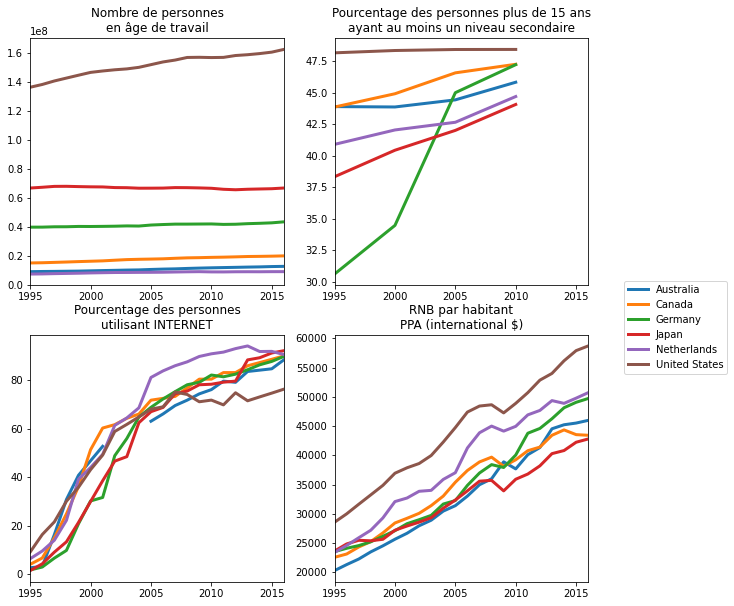

In [64]:
# paramétrage de multi-graphes
fig = plt.figure(figsize=(10,10))
axs = fig.subplots(nrows=2, ncols=2)

x = y = 0
# pour chaque indicateur
for i in range(len(ind)):
    if ind[i] in ['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS']:
        str_years = ['1995', '2000', '2005', '2010','2015']
        ess = data[(data['Indicator Code'].isin(['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS'])) &
                   (data['Country Code'].isin(pays_code))].groupby(['Country Code']).mean()[str_years]
    else:
        str_years = data.columns[4:26]
        ess = data[(data['Indicator Code']==ind[i]) &
                   (data['Country Code'].isin(pays_code))].set_index('Country Code')[str_years]
    years = [int(y) for y in str_years]
    
    # récupération des données correspondantes

        
    # pour chaque pays, trace de la courbe
    for p in ess.index:
        pays = data['Country Name'][data['Country Code']==p].values[0]
        axs[x,y].plot(years,ess.loc[p,str_years],linewidth=3,label=pays)
    
    axs[x,y].xaxis.set_tick_params(labelbottom=True)
    axs[x,y].set_xlim(1995,2016)
    axs[x,y].set_title(title[i])
    
    
    y += 1
    if y==2 :
        x += 1
        y = 0
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(1.1, .55, 0, 0.))

POTENTIELS PAYS
<p>(selon 3 axes)

In [65]:
# 'DEMOGRAPHIE':['SP.POP.TOTL','SL.TLF.TOTL.IN','SL.UEM.TOTL.ZS'],
# 'EDUCATION':['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS'],
# 'MATERIEL':['IT.CMP.PCMP.P2','IT.NET.USER.P2'],
# 'ECONOMIE':['NY.GNP.PCAP.PP.CD','NY.GDP.PCAP.PP.CD','SE.XPD.TOTL.GD.ZS']

Text(0.5, 1.0, 'POTENTIEL DES PAYS\n(taille des bulles = utilisateurs Internet en %)')

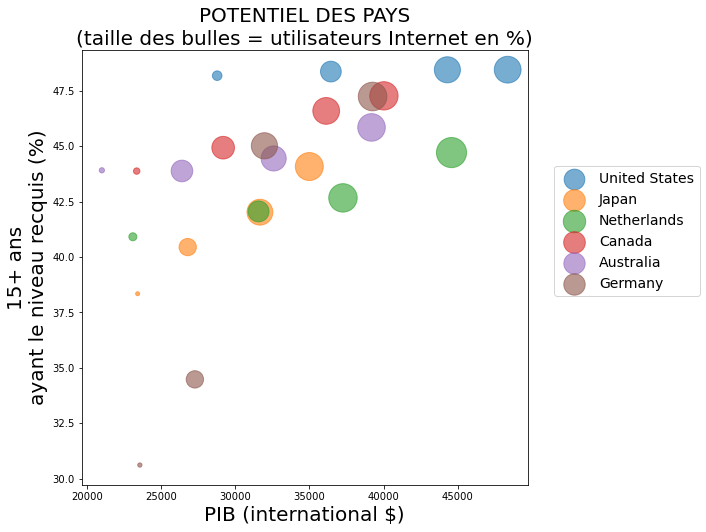

In [66]:
fig = plt.figure(figsize=(8,8))

str_years = data.columns[4:26]
pays_code = ['USA','JPN','NLD','CAN','AUS','DEU']

x = ['NY.GDP.PCAP.PP.CD']
x_ = data[(data['Indicator Code'].isin(x)) &
          (data['Country Code'].isin(pays_code))].groupby(['Country Code']).mean()[str_years]
x_.fillna(x_.mean(axis=1),inplace=True)

y = ['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS']
y_ = data[(data['Indicator Code'].isin(y)) &
          (data['Country Code'].isin(pays_code))].groupby(['Country Code']).mean()[str_years]
y_.fillna(y_.mean(axis=1),inplace=True)

s = ['IT.NET.USER.P2']
s_= data[(data['Indicator Code'].isin(s)) &
         (data['Country Code'].isin(pays_code))].groupby(['Country Code']).mean()[str_years]
s_.fillna(s_.mean(axis=1),inplace=True)
    
    
for p in pays_code:
    pays = data['Country Name'][data['Country Code']==p].values[0]
    plt.scatter(x=x_.loc[p,str_years], y=y_.loc[p,str_years], s=s_.loc[p,str_years]*10,alpha=0.6,label=pays)
           

plt.xlabel('PIB (international $)',fontsize=20)
plt.ylabel('15+ ans\nayant le niveau recquis (%)',fontsize=20)
plt.legend(fontsize=14,bbox_to_anchor=(1, .75, .4, 0))
plt.title('POTENTIEL DES PAYS\n(taille des bulles = utilisateurs Internet en %)',fontsize=20)

<hr />

**III.3.c. Analyses des données par region**

- ***Calcul des ordres de grandeur***

Ici on récupère les données descriptives concernant les pays dans le jeux de données raw_country et on les combine à notre jeu.

In [67]:
# concatenation des donnees numeriques et des donnees d'informations des pays
data_merge = pd.merge(raw_country.iloc[:,[0,5,7,8]],data[data.columns[:27]],on='Country Code')
data_merge.head(3)

,Country Code,Currency Unit,Region,Income Group,Country Name,Indicator Name,Indicator Code,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,moy
0,AFG,Afghan afghani,South Asia,Low income,Afghanistan,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.ICMP.15UP.ZS,6.11,NaN,NaN,...,NaN,NaN,16.090000,NaN,NaN,NaN,NaN,NaN,NaN,11.065000
1,AFG,Afghan afghani,South Asia,Low income,Afghanistan,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.ICMP.15UP.ZS,6.09,NaN,NaN,...,NaN,NaN,6.880000,NaN,NaN,NaN,NaN,NaN,NaN,6.557500
2,AFG,Afghan afghani,South Asia,Low income,Afghanistan,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,...,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641,1879.695509,1422.970941


Ici on regroupe les données selon les régions et on calcule les ordres de grandeurs.

In [68]:
# regroupe les donnees selon la region et sortie des stats classiques
df_gp = data_merge.groupby(by=['Indicator Code','Region']).describe()
df_gp.head(1)

1995                               \
                                         count       mean        std    min   
Indicator Code       Region                                                   
BAR.SEC.ICMP.15UP.ZS East Asia & Pacific  11.0  35.333636  19.063698  10.09   

                                                                        1996  \
                                             25%    50%     75%    max count   
Indicator Code       Region                                                    
BAR.SEC.ICMP.15UP.ZS East Asia & Pacific  21.205  35.46  51.655  60.35   0.0   

                                               ... 2016       moy             \
                                         mean  ...  75% max count       mean   
Indicator Code       Region                    ...                             
BAR.SEC.ICMP.15UP.ZS East Asia & Pacific  NaN  ...  NaN NaN  11.0  39.924318   

                                                                              \
                                               std      min       25%    50%   
Indicator Code       Region                                                    
BAR.SEC.ICMP.15UP.ZS East Asia & Pacific  17.77917  11.8375  27.89125  39.91   

                                                           
                                              75%     max  
Indicator Code       Region                                
BAR.SEC.ICMP.15UP.ZS East Asia & Pacific  54.7775  62.215  

[1 rows x 184 columns]

*Observation :* Le percentile 50% correspond à la médiane

- ***Analyse selon les axes d'études***

Ici on définit des couleurs pour représenter chaque région.

In [69]:
my_pal = {'South Asia':'blue',
          'Latin America & Caribbean':'orange',
          'East Asia & Pacific':'green',
          'Europe & Central Asia':'red',
          'North America':'purple',
          'Sub-Saharan Africa':'saddlebrown',
          'Middle East & North Africa':'violet'}

Pour chaque axe, on récupère les données correspondantes aux différents indicateurs étudiés dans l'axe, on réalise un tri selon leur valeur médiane et on réalise un graphe comparatif des pays.

    - Axe DEMOGRAPHIE

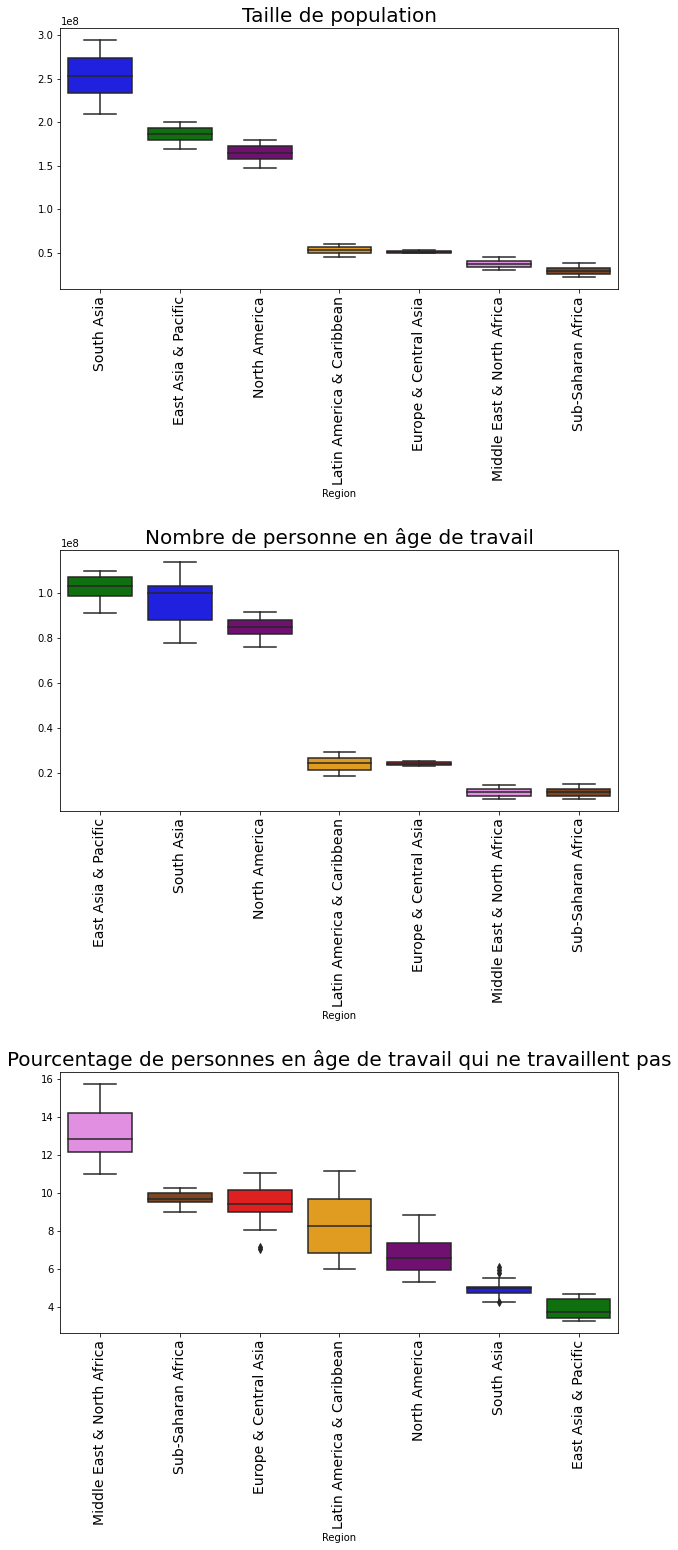

In [70]:
# liste et titre des indicateurs de l'axe
ind = ['SP.POP.TOTL', 'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.ZS']
title = ['Taille de population','Nombre de personne en âge de travail','Pourcentage de personnes en âge de travail qui ne travaillent pas']

# paramétrage de multi-graphes
fig, axs = plt.subplots(len(ind), 1,figsize=(10,8*len(ind)),gridspec_kw={'hspace':1})

# pour chaque indicateur
for i in range(len(ind)):
    # récupération des données correspondantes a l'indicateur
    # changement du format des donnees en format long  
    dm = data_merge[data_merge['Indicator Code']==ind[i]].groupby(by=['Region']).mean().T
    sorted_index = dm.median().sort_values(ascending=False).index
    dm_sorted=dm[sorted_index]
    sns.boxplot(data=dm_sorted,ax=axs[i],palette=my_pal)    
    axs[i].set_title(title[i],fontsize=20)
    axs[i].set_xticklabels(dm_sorted.columns,rotation=90,fontsize=14)

    - Axe EDUCATION

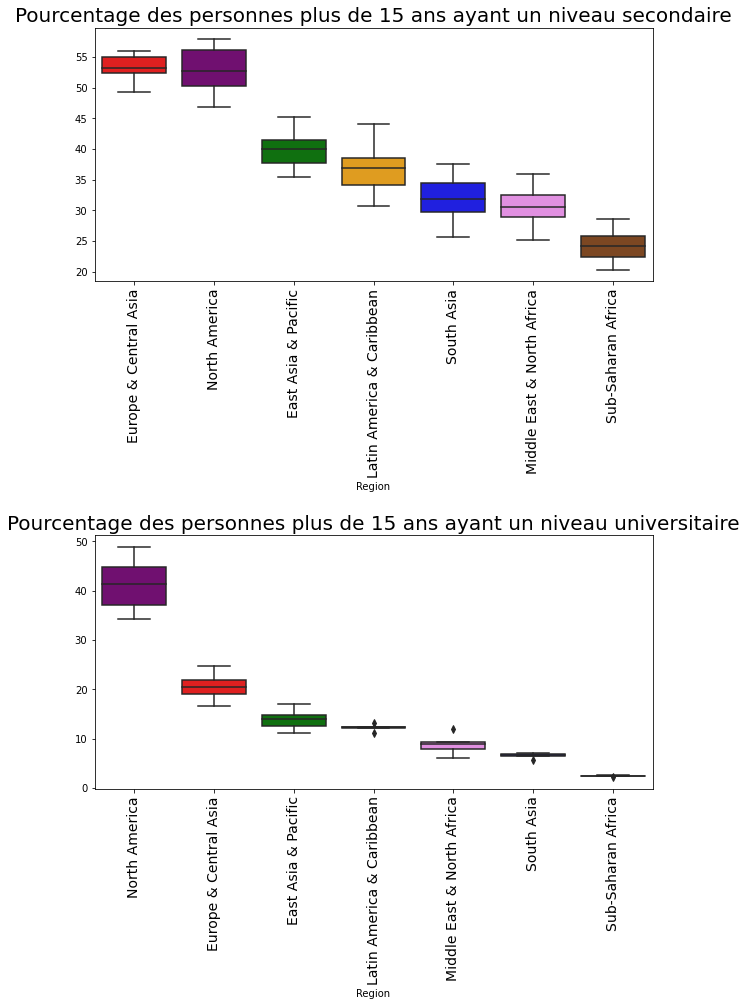

In [71]:
# liste et titre des indicateurs de l'axe
ind = ['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS']
title = ['Pourcentage des personnes plus de 15 ans ayant un niveau secondaire',
        'Pourcentage des personnes plus de 15 ans ayant un niveau universitaire']

# paramétrage de multi-graphes
fig, axs = plt.subplots(len(ind), 1,figsize=(10,7*len(ind)),gridspec_kw={'hspace':1})

# pour chaque indicateur
for i in range(len(ind)):
    # récupération des données correspondantes a l'indicateur
    # changement du format des donnees en format long  
    dm = data_merge[data_merge['Indicator Code']==ind[i]].groupby(by=['Region']).mean().T
    sorted_index = dm.median().sort_values(ascending=False).index
    dm_sorted=dm[sorted_index]
    sns.boxplot(data=dm_sorted,ax=axs[i],palette=my_pal)    
    axs[i].set_title(title[i],fontsize=20)
    axs[i].set_xticklabels(dm_sorted.columns,rotation=90,fontsize=14)

Moyenne des 2 indicateurs

Text(0.5, 1.0, 'Pourcentage des personnes plus de 15 ans\nayant au moins un niveau secondaire')

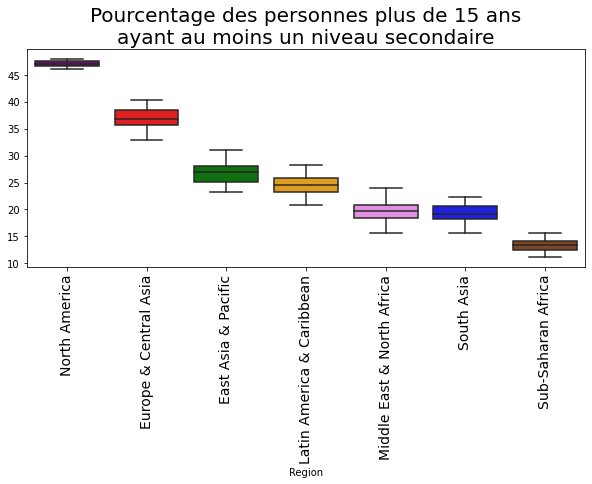

In [72]:
# liste et titre des indicateurs de l'axe
ind = ['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS']

# paramétrage de multi-graphes
fig = plt.figure(figsize=(10,4))

# récupération des données correspondantes a l'indicateur
# changement du format des donnees en format long  
dm = data_merge[data_merge['Indicator Code'].isin(ind)].groupby(by=['Region']).mean().T
sorted_index = dm.median().sort_values(ascending=False).index
dm_sorted=dm[sorted_index]
sns.boxplot(data=dm_sorted,palette=my_pal)
plt.xticks(rotation=90,fontsize=14)   
plt.title('Pourcentage des personnes plus de 15 ans\nayant au moins un niveau secondaire',fontsize=20)

    - Axe RESSOURCE MATERIELLE

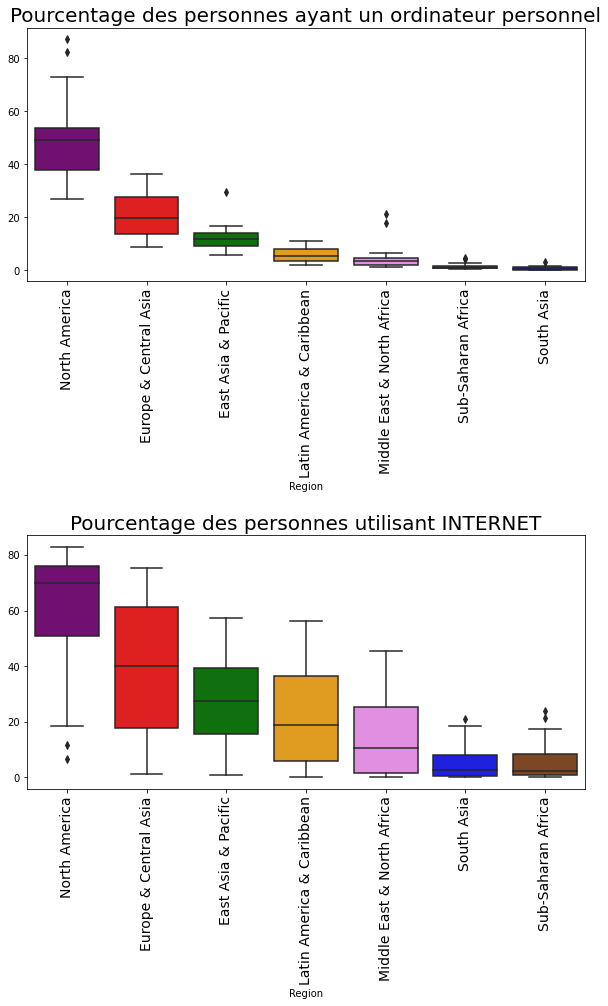

In [73]:
# liste et titre des indicateurs de l'axe
ind = ['IT.CMP.PCMP.P2','IT.NET.USER.P2']
title = ['Pourcentage des personnes ayant un ordinateur personnel',
        'Pourcentage des personnes utilisant INTERNET']

# paramétrage de multi-graphes
fig, axs = plt.subplots(len(ind), 1,figsize=(10,7*len(ind)),gridspec_kw={'hspace':1})

# pour chaque indicateur
for i in range(len(ind)):
    # récupération des données correspondantes a l'indicateur
    # changement du format des donnees en format long  
    dm = data_merge[data_merge['Indicator Code']==ind[i]].groupby(by=['Region']).mean().T
    sorted_index = dm.median().sort_values(ascending=False).index
    dm_sorted=dm[sorted_index]
    sns.boxplot(data=dm_sorted,ax=axs[i],palette=my_pal)    
    axs[i].set_title(title[i],fontsize=20)
    axs[i].set_xticklabels(dm_sorted.columns,rotation=90,fontsize=14)

    - Axe RESSOURCE ECONOMIQUE

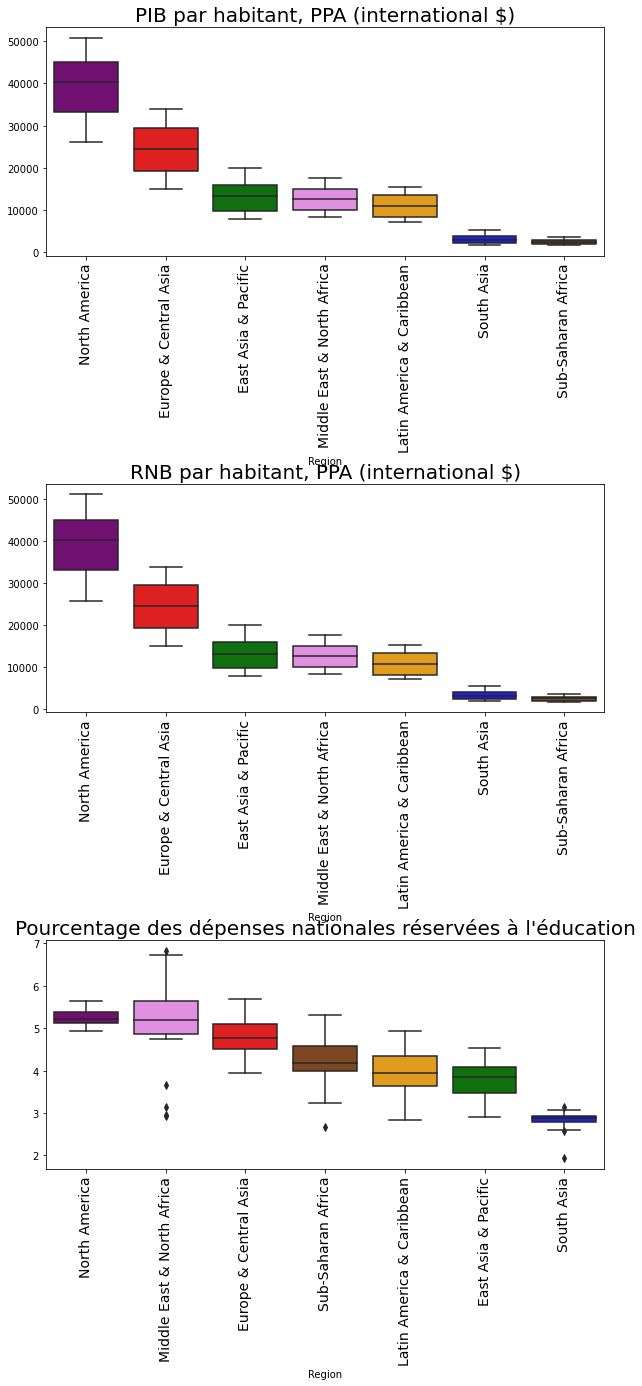

In [74]:
# liste et titre des indicateurs de l'axe
ind = ['NY.GDP.PCAP.PP.CD','NY.GNP.PCAP.PP.CD','SE.XPD.TOTL.GD.ZS']
title = ['PIB par habitant, PPA (international $)','RNB par habitant, PPA (international $)',
        "Pourcentage des dépenses nationales réservées à l'éducation"]

# paramétrage de multi-graphes
fig, axs = plt.subplots(len(ind), 1,figsize=(10,7*len(ind)),gridspec_kw={'hspace':1})

# pour chaque indicateur
for i in range(len(ind)):
    # récupération des données correspondantes a l'indicateur
    # changement du format des donnees en format long  
    dm = data_merge[data_merge['Indicator Code']==ind[i]].groupby(by=['Region']).mean().T
    sorted_index = dm.median().sort_values(ascending=False).index
    dm_sorted=dm[sorted_index]
    sns.boxplot(data=dm_sorted,ax=axs[i],palette=my_pal)
    axs[i].set_title(title[i],fontsize=20)
    axs[i].set_xticklabels(dm_sorted.columns,rotation=90,fontsize=14)

*Observation :* Au vu des analyses des régions selon les 4 axes d'études, on note 2 régions avec un fort potentiel (inclus dans les 3 premiers régions pour les 4 axes)
<p>=> North America, Europe & Central Asia

**III.3.d. Analyses de l'évolution des données pour ces 2 regions**

Pour les 2 régions à fort potentiel, on récupère les données correspondantes aux différents indicateurs étudiés pour chaque axe et on réalise un graphe temporel des données avec les moyennes et écart-type des données annuelles au sein des régions.

In [75]:
ind = ['SL.TLF.TOTL.IN','BAR.SEC.ICMP.15UP.ZS','IT.NET.USER.P2','NY.GNP.PCAP.PP.CD']
title = ['Nombre de personnes\nen âge de travail',
         'Pourcentage des personnes plus de 15 ans\nayant au moins un niveau secondaire',
         'Pourcentage des personnes\nutilisant INTERNET',
         'RNB par habitant\nPPA (international $)']

region = ['North America', 'Europe & Central Asia','East Asia & Pacific']

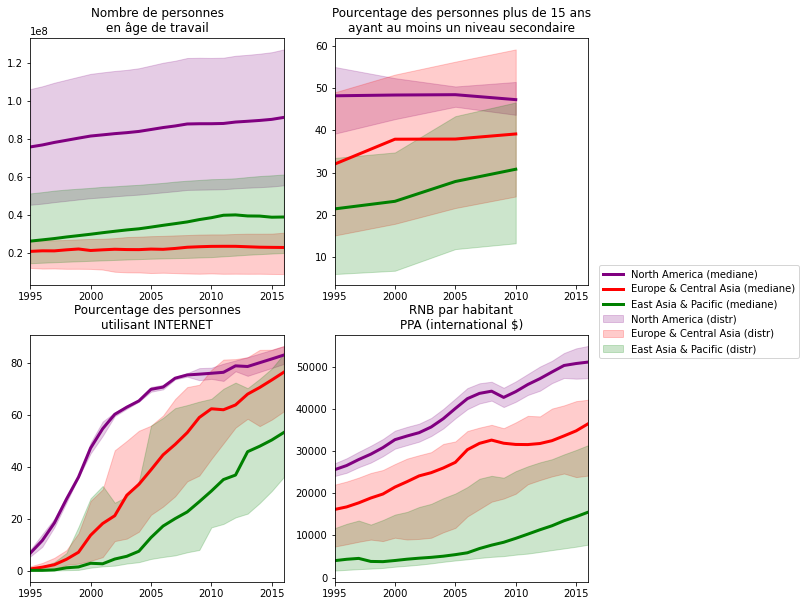

In [76]:
fig = plt.figure(figsize=(10,10))
axs = fig.subplots(nrows=2, ncols=2)

x = y = 0

for i in range(len(ind)):
    if ind[i] in ['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS']:
        str_years = ['1995', '2000', '2005', '2010']
        q_inf = data_merge[data_merge['Indicator Code'].isin(['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS'])].groupby(by=['Region']).quantile(.25)
        q_med = data_merge[data_merge['Indicator Code'].isin(['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS'])].groupby(by=['Region']).quantile(.5)
        q_sup = data_merge[data_merge['Indicator Code'].isin(['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS'])].groupby(by=['Region']).quantile(.75)
    else :
        str_years = data_merge.columns[7:29]  
        q_inf = data_merge[data_merge['Indicator Code']==ind[i]].groupby(by=['Region']).quantile(.25)
        q_med = data_merge[data_merge['Indicator Code']==ind[i]].groupby(by=['Region']).quantile(.5)
        q_sup = data_merge[data_merge['Indicator Code']==ind[i]].groupby(by=['Region']).quantile(.75)
    years = [int(y) for y in str_years]
    
    
    for reg in region:
        axs[x,y].plot(years,q_med.loc[reg,str_years],color=my_pal[reg],linewidth=3,label=f'{reg} (mediane)')
        axs[x,y].fill_between(years,q_inf.loc[reg,str_years],q_sup.loc[reg,str_years],color=my_pal[reg],alpha=0.2,label=f'{reg} (distr)')
    axs[x,y].set_xlim(1995,2016)            
    axs[x,y].set_title(title[i])
    
    
    y += 1
    if y==2 :
        x += 1
        y = 0

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='center right', bbox_to_anchor=(1.2, .5, 0, 0.))

POTENTIEL REGION
<p>(selon 3 axes)

Text(0.5, 1.0, 'POTENTIEL DES PAYS\n(taille des bulles = utilisateurs Internet en %)')

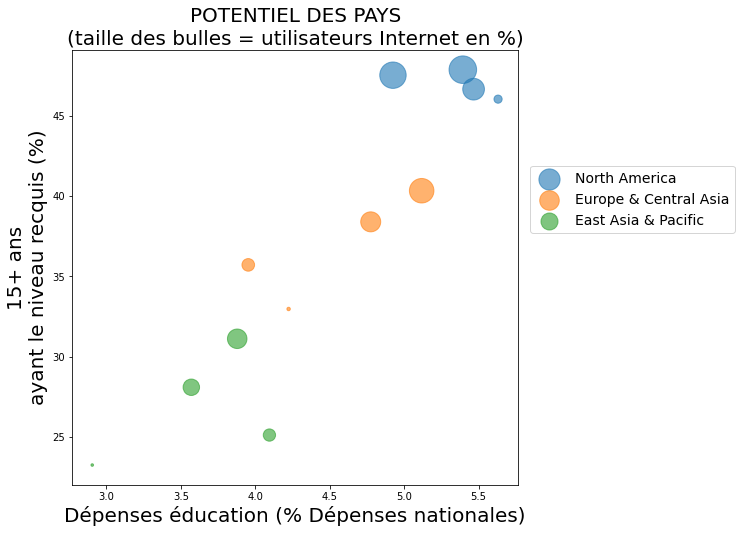

In [77]:
fig = plt.figure(figsize=(8,8))

str_years = data_merge.columns[7:29] 

region = ['North America', 'Europe & Central Asia','East Asia & Pacific']

x = ['SE.XPD.TOTL.GD.ZS']#'SL.UEM.TOTL.ZS''SL.TLF.TOTL.IN'
x_ = data_merge[(data_merge['Indicator Code'].isin(x)) &
          (data_merge['Region'].isin(region))].groupby(['Region']).mean()[str_years]
x_.fillna(x_.mean(axis=1),inplace=True)

y = ['BAR.SEC.ICMP.15UP.ZS','BAR.TER.ICMP.15UP.ZS']
y_ = data_merge[(data_merge['Indicator Code'].isin(y)) &
          (data_merge['Region'].isin(region))].groupby(['Region']).mean()[str_years]
y_.fillna(y_.mean(axis=1),inplace=True)

s = ['IT.NET.USER.P2']
s_= data_merge[(data_merge['Indicator Code'].isin(s)) &
         (data_merge['Region'].isin(region))].groupby(['Region']).mean()[str_years]
s_.fillna(s_.mean(axis=1),inplace=True)
    
    
for r in region:
    plt.scatter(x=x_.loc[r,str_years], y=y_.loc[r,str_years], s=s_.loc[r,str_years]*10,alpha=0.6,label=r)
           

plt.xlabel('Dépenses éducation (% Dépenses nationales)',fontsize=20)
plt.ylabel('15+ ans\nayant le niveau recquis (%)',fontsize=20)
plt.legend(fontsize=14,bbox_to_anchor=(1, .75, .5, 0))
plt.title('POTENTIEL DES PAYS\n(taille des bulles = utilisateurs Internet en %)',fontsize=20)